In [27]:
import tensorflow as tf
from tensorflow import keras
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2
import livelossplot  # Loss function 
from livelossplot import PlotLossesKerasTF # 
import pandas as pd


In [5]:
# Set the training path and validation path

train_path = '../data/processed/data_Lung_Infection/train/'
validation_path = '../data/processed/data_Lung_Infection/test/'

In [3]:
os.listdir(train_path)

['Type 1 disease', '.DS_Store', 'Healthy', 'Type 2 disease']

## Image Vidualization

In [4]:
print("Training set:\n------------")

num_Healthy = len(os.listdir(os.path.join(train_path, 'Healthy')))
num_Type1 = len(os.listdir(os.path.join(train_path, 'Type 1 disease')))
num_Type2 = len(os.listdir(os.path.join(train_path, 'Type 2 disease')))
print(f"Healthy= {num_Healthy}")
print(f"num_Type1= {num_Type1}")
print(f"num_Type2= {num_Type2}")

print("\n")

print("Validation set:\n------------")

num_Healthy = len(os.listdir(os.path.join(validation_path, 'Healthy')))
num_Type1 = len(os.listdir(os.path.join(validation_path, 'Type 1 disease')))
num_Type2 = len(os.listdir(os.path.join(validation_path, 'Type 2 disease')))
print(f"Healthy= {num_Healthy}")
print(f"num_Type1= {num_Type1}")
print(f"num_Type2= {num_Type2}")


Training set:
------------
Healthy= 70
num_Type1= 102
num_Type2= 70


Validation set:
------------
Healthy= 20
num_Type1= 23
num_Type2= 20


Healthy


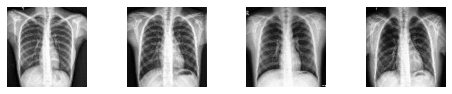

In [66]:
multipleImages = glob('../data/processed/data_Lung_Infection/train/Healthy/**')
print("Healthy")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for l in multipleImages[:4]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(1,5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); 
    plt.axis('off')
    i_ += 1


Type 1 disease


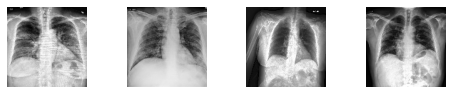

In [61]:
multipleImages = glob('../data/processed/data_Lung_Infection/train/Type 1 disease/**')
print("Type 1 disease")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for l in multipleImages[:4]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(2,5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); 
    plt.axis('off')
    i_ += 1

Type 2 disease


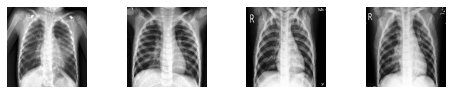

In [62]:
multipleImages = glob('../data/processed/data_Lung_Infection/train/Type 2 disease/**')
print("Type 2 disease")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for l in multipleImages[:4]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(2,5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); 
    plt.axis('off')
    i_ += 1

## Distribution of Image across the class

## CNN Architecture 1

In [7]:
#Preprocessing --- Goal to make the data compatible for CNN input
# In tensorflow, you can achieve the same using ImageGenerators


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.,
                                                                  rotation_range=90,
                                                                  zoom_range=0.2,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [8]:
#Pass the images through the generator

trainImageData = train_generator.flow_from_directory(train_path,
                                                     batch_size=32, #how many images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 


testImageData = test_generator.flow_from_directory(validation_path,
                                                     batch_size=32, #how many images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 

Found 242 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [6]:
print(trainImageData.image_shape)
print(testImageData.image_shape)

(48, 48, 3)
(48, 48, 3)


In [7]:
trainImageData.class_indices


{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [9]:
trainImageData.image_shape

(48, 48, 3)

In [10]:
# ARchitect the model

model = tf.keras.models.Sequential()

#Convolution Layer
#================================================================================================================================================
#First Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#Second Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 
model.add(tf.keras.layers.Dropout(.2,noise_shape=None, seed=None))#Dropout


#Third Convolution Layer

model.add(tf.keras.layers.Conv2D(8 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer='zeros',
    gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones',
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None

)) #BathNormalization

#=================================================================================================================================================
# Flatten

model.add(tf.keras.layers.Flatten())

#=================================================================================================================================================
# ANN
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 1 , activation="sigmoid"))

Metal device set to: Apple M1


2022-10-01 08:45:18.017704: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-01 08:45:18.018303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 dropout (Dropout)           (None, 24, 24, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 8)         1160      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 8)        32        
 ormalization)                                          

In [12]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

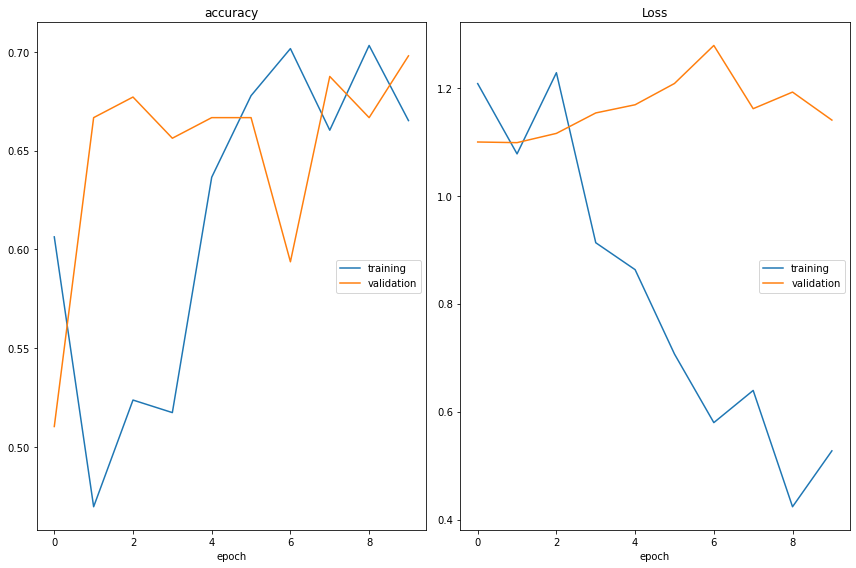

accuracy
	training         	 (min:    0.470, max:    0.703, cur:    0.665)
	validation       	 (min:    0.510, max:    0.698, cur:    0.698)
Loss
	training         	 (min:    0.424, max:    1.228, cur:    0.527)
	validation       	 (min:    1.099, max:    1.279, cur:    1.140)
7/7 [==============================] - 5s 751ms/step - loss: 0.5272 - accuracy: 0.6652 - val_loss: 1.1403 - val_accuracy: 0.6979


In [14]:
# Fit the model
model.fit(trainImageData,
          validation_data=testImageData,
          epochs=10,
          callbacks=[PlotLossesKerasTF()],
          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size,
          validation_steps= len(testImageData.filenames) // testImageData.batch_size)

## CNN Architecture 2: MobileNet


In [16]:
# Generate  data for MobileNet model
train_generator_mobNet = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

test_generator_mobNet = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)


In [17]:
trainImageData_mobNet = train_generator_mobNet.flow_from_directory(train_path,
                                                     batch_size=32, #how many images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(224,224) #Ensures all images are of same size (resizing)
                                                     ) 


testImageData_mobNet = test_generator_mobNet.flow_from_directory(validation_path,
                                                     batch_size=32, #how many images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(224,224) #Ensures all images are of same size (resizing)
                                                     ) 

Found 242 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [25]:
trainImageData_mobNet.class_indices

{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [104]:
# create base model instance 
model_mobNet = tf.keras.applications.mobilenet.MobileNet(input_shape = [224,224,3],
                                                         weights='imagenet',
                                                         include_top=False)#False mean exclude FC layer from existing architecture.

# Locking the weights of CNN layer. Disabile the training manually
for layer in model_mobNet.layers:
    layer.trainable = False
    

# Create FC layer

flatten = tf.keras.layers.Flatten()



# Output layer/ANN
hLayer1 = tf.keras.layers.Dense(4000, activation = "relu")
hLayer2 = tf.keras.layers.Dropout(0.2)
hLayer3 = tf.keras.layers.BatchNormalization(
        axis=-1,
        momentum=0.99,
        epsilon=0.001,
        center=True,
        scale=True,
        beta_initializer='zeros',
        gamma_initializer='ones',
        moving_mean_initializer='zeros',
        moving_variance_initializer='ones',
        beta_regularizer=None,
        gamma_regularizer=None,
        beta_constraint=None,
        gamma_constraint=None)



finalLayer = tf.keras.layers.Dense(3, activation= "softmax") # units =3 because we have 3 labels




In [105]:
# Create Final Model

mob_model_Final = tf.keras.models.Sequential([model_mobNet, 
                                              flatten,
                                              hLayer1,
                                              hLayer2,
                                              hLayer3,
                                              finalLayer
                                             ])



In [106]:
mob_model_Final.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 50176)             0         
                                                                 
 dense_16 (Dense)            (None, 4000)              200708000 
                                                                 
 dropout_6 (Dropout)         (None, 4000)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 4000)             16000     
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 3)               

In [22]:
#Callbacks

# How to stop the training process if my model has converged successfully?

# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL


# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 10:
      self.model.stop_training=True

In [107]:
 #Compile
base_learning_rate = 0.0001
mob_model_Final.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              metrics=['accuracy'])

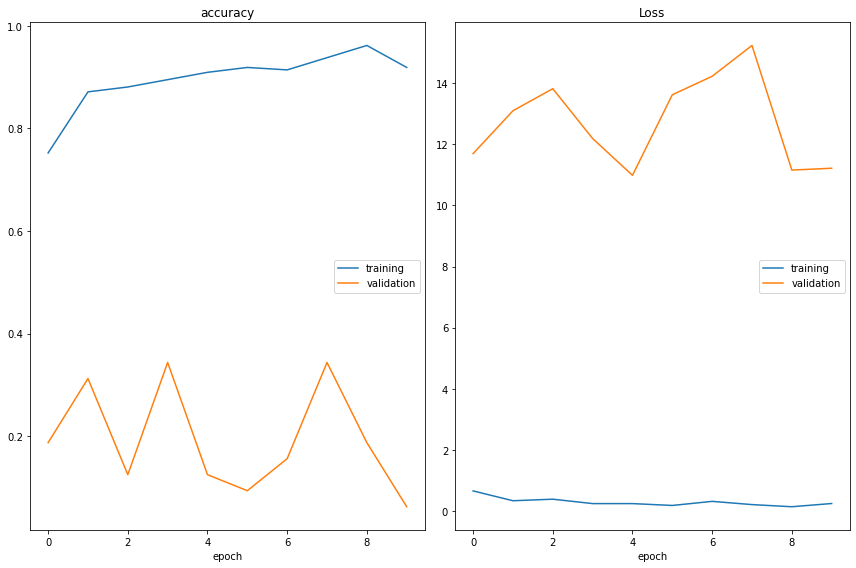

accuracy
	training         	 (min:    0.752, max:    0.962, cur:    0.919)
	validation       	 (min:    0.062, max:    0.344, cur:    0.062)
Loss
	training         	 (min:    0.143, max:    0.661, cur:    0.248)
	validation       	 (min:   10.984, max:   15.232, cur:   11.216)
7/7 [==============================] - 7s 924ms/step - loss: 0.2485 - accuracy: 0.9190 - val_loss: 11.2160 - val_accuracy: 0.0625


In [108]:
# #Fit Model 
batch_size=32
mob_model_Final.fit(trainImageData_mobNet,
          validation_data=testImageData_mobNet,
          epochs=10,
          steps_per_epoch = len(trainImageData_mobNet.filenames) // batch_size,
          validation_steps= len(testImageData_mobNet.filenames) // batch_size,
        callbacks=[MyQualityThreshold(0.8),PlotLossesKerasTF()])

## CNN Architecture 3: Densenet121

In [ ]:
tf.keras.applications.densenet.preprocess_input 

In [3]:
# Generate  data for Densewnet121 model
train_generator_denseNet = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

test_generator_denseNet= tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)


In [6]:
trainImageData_denseNet = train_generator_denseNet.flow_from_directory(train_path,
                                                     batch_size=32, #how many images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(224,224) #Ensures all images are of same size (resizing)
                                                     ) 


testImageData_denseNet = test_generator_denseNet.flow_from_directory(validation_path,
                                                     batch_size=32, #how many images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(224,224) #Ensures all images are of same size (resizing)
                                                     ) 

Found 242 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [10]:
trainImageData_denseNet.class_indices

{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [14]:
# create base model instance 
model_denseNet = tf.keras.applications.densenet.DenseNet121(input_shape = [224,224,3],
                                                         weights='imagenet',
                                                         include_top=False)#False mean exclude FC layer from existing architecture.

# Locking the weights of CNN layer. Disabile the training manually: freez the layer
for layer in model_denseNet.layers:
    layer.trainable = False
    

# Create FC layer

flatten = tf.keras.layers.Flatten()



# Output layer/ANN
hLayer1 = tf.keras.layers.Dense(4000, activation = "relu")
hLayer2 = tf.keras.layers.Dropout(0.2)
hLayer3 = tf.keras.layers.BatchNormalization(
        axis=-1,
        momentum=0.99,
        epsilon=0.001,
        center=True,
        scale=True,
        beta_initializer='zeros',
        gamma_initializer='ones',
        moving_mean_initializer='zeros',
        moving_variance_initializer='ones',
        beta_regularizer=None,
        gamma_regularizer=None,
        beta_constraint=None,
        gamma_constraint=None)



finalLayer = tf.keras.layers.Dense(3, activation= "softmax") # units =3 because we have 3 labels

In [17]:
# Create Final Model

denseNet_model_Final = tf.keras.models.Sequential([model_denseNet, 
                                              flatten,
                                              hLayer1,
                                              hLayer2,
                                              hLayer3,
                                              finalLayer
                                             ])


In [18]:
denseNet_model_Final.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 4000)              200708000 
                                                                 
 dropout (Dropout)           (None, 4000)              0         
                                                                 
 batch_normalization (BatchN  (None, 4000)             16000     
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 12003     
                                                      

In [19]:
 #Compile
base_learning_rate = 0.0001
denseNet_model_Final.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

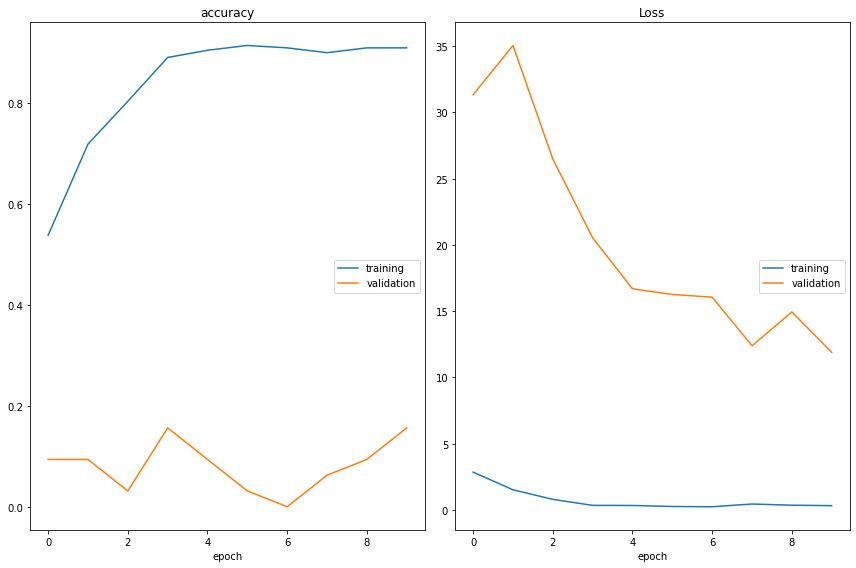

accuracy
	training         	 (min:    0.538, max:    0.914, cur:    0.910)
	validation       	 (min:    0.000, max:    0.156, cur:    0.156)
Loss
	training         	 (min:    0.247, max:    2.859, cur:    0.329)
	validation       	 (min:   11.895, max:   35.055, cur:   11.895)
7/7 [==============================] - 7s 987ms/step - loss: 0.3294 - accuracy: 0.9095 - val_loss: 11.8951 - val_accuracy: 0.1562


In [23]:
# #Fit Model 
batch_size=32
denseNet_model_Final.fit(trainImageData_denseNet,
          validation_data=testImageData_denseNet,
          epochs=10,
          steps_per_epoch = len(trainImageData_denseNet.filenames) // batch_size,
          validation_steps= len(testImageData_denseNet.filenames) // batch_size,
        callbacks=[MyQualityThreshold(0.8),PlotLossesKerasTF()])

## Comparison of Models

In [31]:
models_dict = {'CNN': 66.52, 'imageNet': 91.90, 'DenseNet' : 90.95 }
models_scores = pd.Series(models_dict)
models_scores = models_scores.sort_values()

Text(0.5, 1.0, 'Training accuracy of All Models Tested')

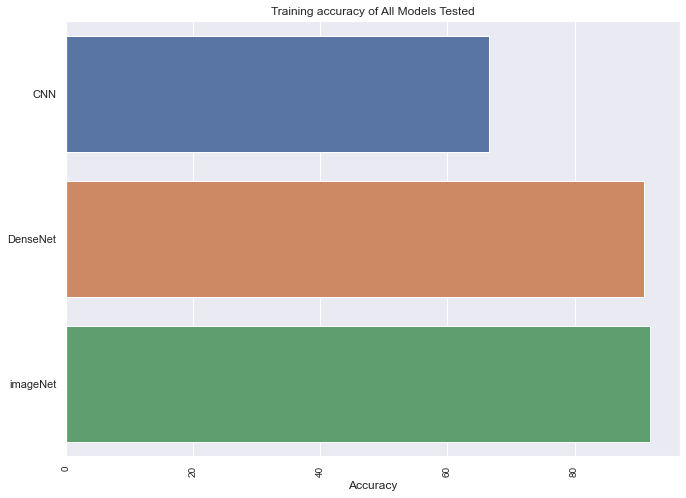

In [35]:
from matplotlib import pyplot
import seaborn as sns

sns.set(rc={'figure.figsize':(,8)})
sns.barplot(x=models_scores.values, y = models_scores.index, orient='h')

plt.xlabel('Accuracy')
plt.xticks(rotation='vertical',fontsize=10)
plt.title('Training accuracy of All Models Tested')